In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('flight.csv')

# Check top 5 rows
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6.0,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717.0,3/31/2014,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0
1,28065,2/19/2007,8/3/2007,Male,6.0,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678.0,3/25/2014,7.0,5.194245,17.0,29.0,1.252314,415768.0,33.0
2,55106,2/1/2007,8/30/2007,Male,6.0,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712.0,3/21/2014,11.0,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,8/22/2008,8/23/2008,Male,5.0,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336.0,12/26/2013,97.0,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,4/10/2009,4/15/2009,Male,6.0,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928.0,3/27/2014,5.0,4.788079,47.0,27.0,0.970658,338813.0,39.0


In [3]:
# Check data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50939 entries, 0 to 50938
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          50939 non-null  int64  
 1   FFP_DATE           50939 non-null  object 
 2   FIRST_FLIGHT_DATE  50939 non-null  object 
 3   GENDER             50936 non-null  object 
 4   FFP_TIER           50938 non-null  float64
 5   WORK_CITY          49146 non-null  object 
 6   WORK_PROVINCE      48384 non-null  object 
 7   WORK_COUNTRY       50920 non-null  object 
 8   AGE                50629 non-null  float64
 9   LOAD_TIME          50938 non-null  object 
 10  FLIGHT_COUNT       50938 non-null  float64
 11  BP_SUM             50938 non-null  float64
 12  SUM_YR_1           50783 non-null  float64
 13  SUM_YR_2           50905 non-null  float64
 14  SEG_KM_SUM         50938 non-null  float64
 15  LAST_FLIGHT_DATE   50938 non-null  object 
 16  LAST_TO_END        509

In [4]:
# Columns that have missing values (in percentage)
null_sum = df.isna().sum()
df_null = pd.DataFrame()
df_null['columns'] = null_sum[null_sum>0].index
df_null['missing values'] = null_sum[null_sum>0].values
df_null['pct'] = round(df_null['missing values']/len(df)*100,3)
df_null.sort_values(by='pct',ascending=False).reset_index(drop=True)

,columns,missing values,pct
0,WORK_PROVINCE,2555,5.016
1,WORK_CITY,1793,3.520
2,AGE,310,0.609
3,SUM_YR_1,156,0.306
4,SUM_YR_2,34,0.067
5,WORK_COUNTRY,19,0.037
6,GENDER,3,0.006
7,FLIGHT_COUNT,1,0.002
8,BP_SUM,1,0.002
9,LOAD_TIME,1,0.002


In [5]:
# Total number of rows that contain missing values (in percentage)
df_nan = df[df.isna().any(axis=1)]
len(df_nan)/len(df)*100

6.6707238069063

In [6]:
# Drop rows that contain missing values
df.dropna(inplace=True)

In [7]:
# Sanity check
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [8]:
# Check the number of duplicated rows
df.duplicated().sum()

0

In [9]:
# 1st criteria: fare prices are not zero
crit_1 = (df['SUM_YR_1']!=0)|(df['SUM_YR_2']!=0)
# 2nd criteria: average discount and total mileage are 0
crit_2 = (df['avg_discount']==0)&(df['SEG_KM_SUM']==0)

# Grab all rows that meet any of those criteria
df[(crit_1|crit_2)]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6.0,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717.0,3/31/2014,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0
2,55106,2/1/2007,8/30/2007,Male,6.0,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712.0,3/21/2014,11.0,5.298507,18.0,20.0,1.254676,406361.0,26.0
3,21189,8/22/2008,8/23/2008,Male,5.0,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336.0,12/26/2013,97.0,27.863636,73.0,11.0,1.090870,372204.0,12.0
4,39546,4/10/2009,4/15/2009,Male,6.0,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928.0,3/27/2014,5.0,4.788079,47.0,27.0,0.970658,338813.0,39.0
5,56972,2/10/2008,9/29/2009,Male,6.0,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585.0,1/13/2014,79.0,7.043956,52.0,10.0,0.967692,343121.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50933,15257,11/9/2011,12/22/2011,Male,4.0,changchun,jilin,CN,46.0,3/31/2014,...,0.0,2799.0,6/12/2012,659.0,10.000000,18.0,0.0,0.933333,3984.0,1.0
50934,32088,2/22/2011,2/22/2011,Male,4.0,shanghai,shanghai,CN,34.0,3/31/2014,...,1260.0,2750.0,10/9/2013,175.0,395.000000,395.0,0.0,0.949964,2422.0,0.0
50935,36120,11/11/2009,6/25/2011,Male,4.0,shenzhenshi,guangdong,CN,36.0,3/31/2014,...,1260.0,2750.0,11/9/2013,144.0,580.000000,580.0,3.0,0.949964,17165.0,14.0
50936,8445,2/14/2006,2/17/2006,Male,4.0,shenyang,liaoning,CN,39.0,3/31/2014,...,2029.0,5870.0,11/16/2013,137.0,4.000000,4.0,0.0,0.445000,1069.0,0.0


In [10]:
# Save these cleaned dataset to a new dataframe
df_clean = df[(crit_1|crit_2)].copy()

In [11]:
# Divide numerical and categorical columns
num_cols = df_clean.select_dtypes(['int64','float64']).columns.tolist()
cat_cols = df_clean.select_dtypes(['object']).columns.tolist()

In [12]:
# Summary statistics
df_clean[cat_cols].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,47398,47398,47398,47398,47398,47398,47398,47398
unique,3060,3374,2,2581,977,91,1,728
top,1/13/2011,9/9/2005,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,118,73,36714,7787,14262,44662,47398,877


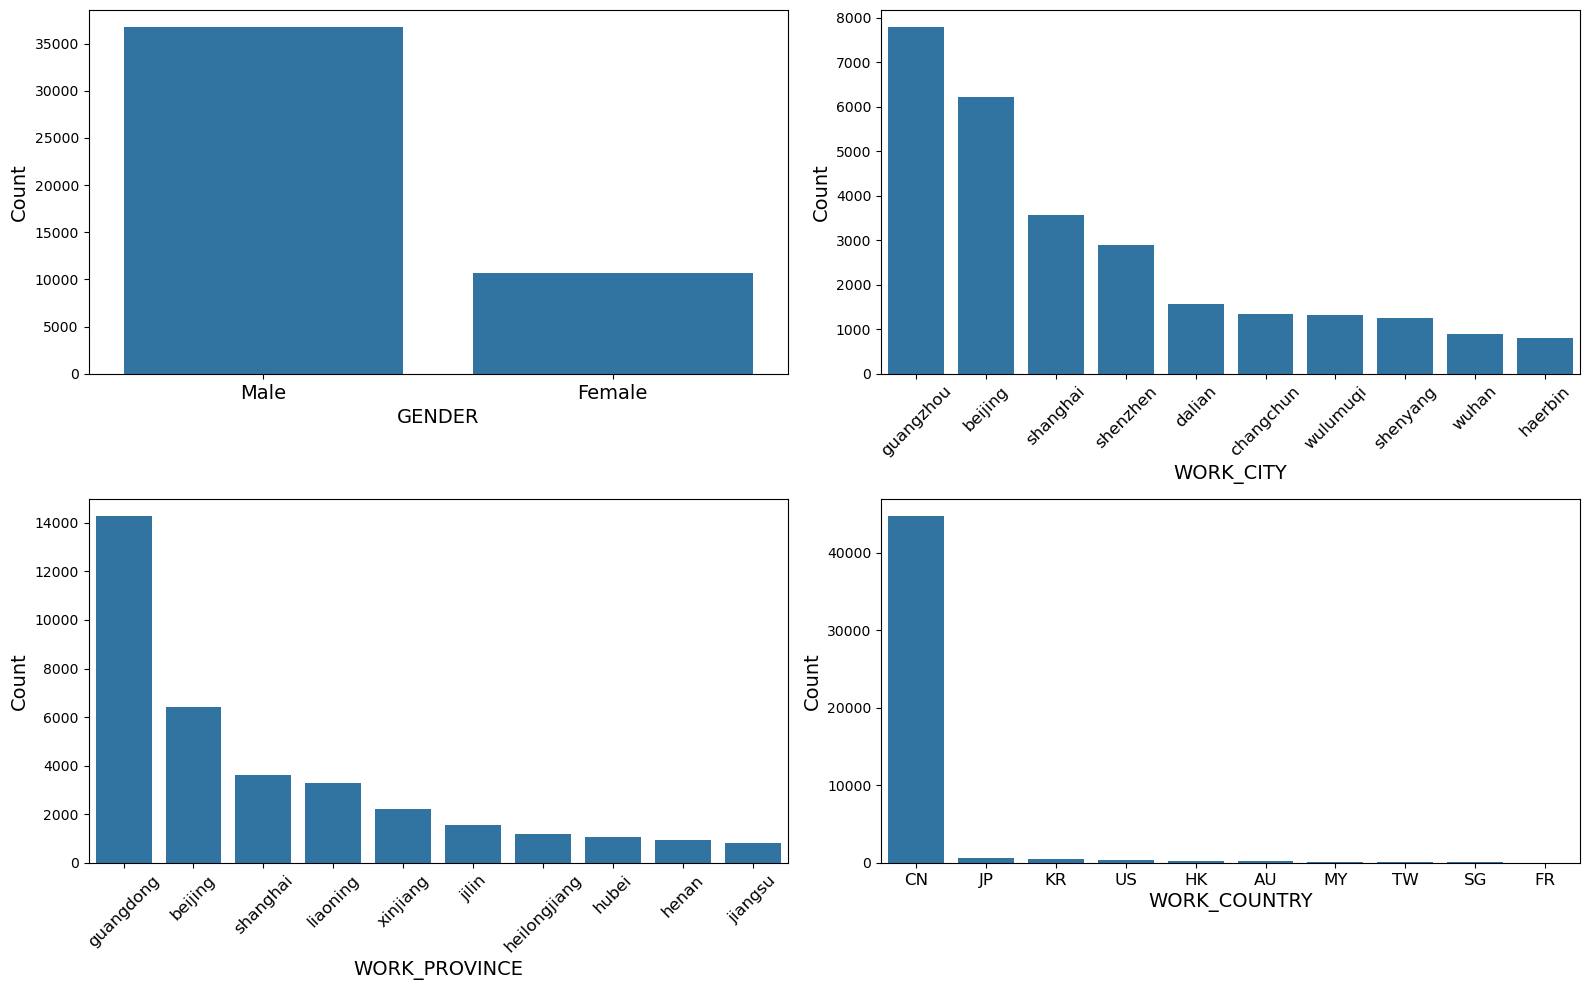

In [13]:
# Make figure and axes objects
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# Countplot for gender
sns.countplot(x='GENDER',data=df_clean,ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelsize=14)
ax[0,0].set_xlabel('GENDER',fontsize=14)
ax[0,0].set_ylabel('Count',fontsize=14)

# Barplot for work_city
work_city_top10 = df_clean['WORK_CITY'].value_counts().head(10)
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0,1])
ax[0,1].tick_params(axis='x', labelrotation= 45,labelsize=12)
ax[0,1].set_xlabel('WORK_CITY',fontsize=14)
ax[0,1].set_ylabel('Count',fontsize=14)

# Barplot for work_province
work_province_top10 = df_clean['WORK_PROVINCE'].value_counts().head(10)
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1,0])
ax[1,0].tick_params(axis='x', labelrotation= 45,labelsize=12)
ax[1,0].set_xlabel('WORK_PROVINCE',fontsize=14)
ax[1,0].set_ylabel('Count',fontsize=14)

# Barplot for work_country
work_country_top10 = df_clean['WORK_COUNTRY'].value_counts().head(10)
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[1,1])
ax[1,1].tick_params(axis='x', labelsize=12)
ax[1,1].set_xlabel('WORK_COUNTRY',fontsize=14)
ax[1,1].set_ylabel('Count',fontsize=14)

plt.tight_layout()

In [14]:
# Convert to datetime object
ffp_date = pd.to_datetime(df_clean['FFP_DATE'])
# Get the year and month
ffp_date_year = ffp_date.dt.year
ffp_date_month = ffp_date.dt.month

Text(0.5, 0, 'FFP Date Month')

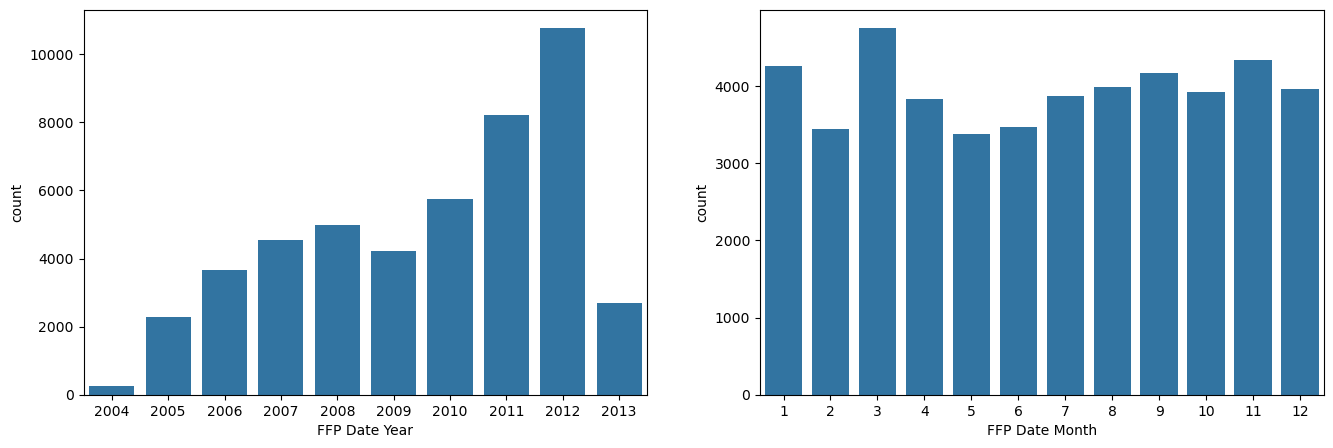

In [15]:
# Check the countplot
plt.figure(figsize=(16,5))

# Countplot for year
plt.subplot(1,2,1)
sns.countplot(x=ffp_date_year)
plt.xlabel('FFP Date Year')

plt.subplot(1,2,2)
sns.countplot(x=ffp_date_month)
plt.xlabel('FFP Date Month')

In [16]:
# Summary statistics
df_clean[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,47398.0,31637.337272,18210.095129,3.000000,15834.500000,31720.500000,47476.750000,62988.0
FFP_TIER,47398.0,4.126567,0.411548,4.000000,4.000000,4.000000,4.000000,6.0
AGE,47398.0,42.597219,9.653155,6.000000,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,47398.0,14.228659,14.958327,2.000000,5.000000,9.000000,18.000000,213.0
BP_SUM,47398.0,13294.889911,17293.703834,0.000000,4112.000000,7746.000000,15506.000000,505308.0
SUM_YR_1,47398.0,6394.023862,8653.657600,0.000000,1674.000000,3820.000000,7928.750000,239560.0
SUM_YR_2,47398.0,6834.998038,9281.182481,0.000000,1626.250000,3963.000000,8411.000000,234188.0
SEG_KM_SUM,47398.0,20653.359952,21943.772110,1757.000000,7438.500000,13363.500000,25336.750000,580717.0
LAST_TO_END,47398.0,141.656378,159.426392,1.000000,22.000000,80.000000,202.000000,730.0
AVG_INTERVAL,47398.0,59.203325,56.532184,0.000000,25.333333,43.538462,73.600000,712.0


In [17]:
# Check the oldest customer
df_clean[df_clean['AGE']==110]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,4/14/2005,5/18/2005,Female,4.0,shenzhenshi,guangdong,CN,110.0,3/31/2014,...,2888.0,14053.0,4/6/2013,361.0,50.333333,214.0,1.0,0.740881,11194.0,3.0


In [18]:
# Check the highest SEG_KM_SUM
df_clean[df_clean['SEG_KM_SUM']==df_clean['SEG_KM_SUM'].max()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6.0,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717.0,3/31/2014,1.0,3.483254,18.0,34.0,0.961639,619760.0,50.0


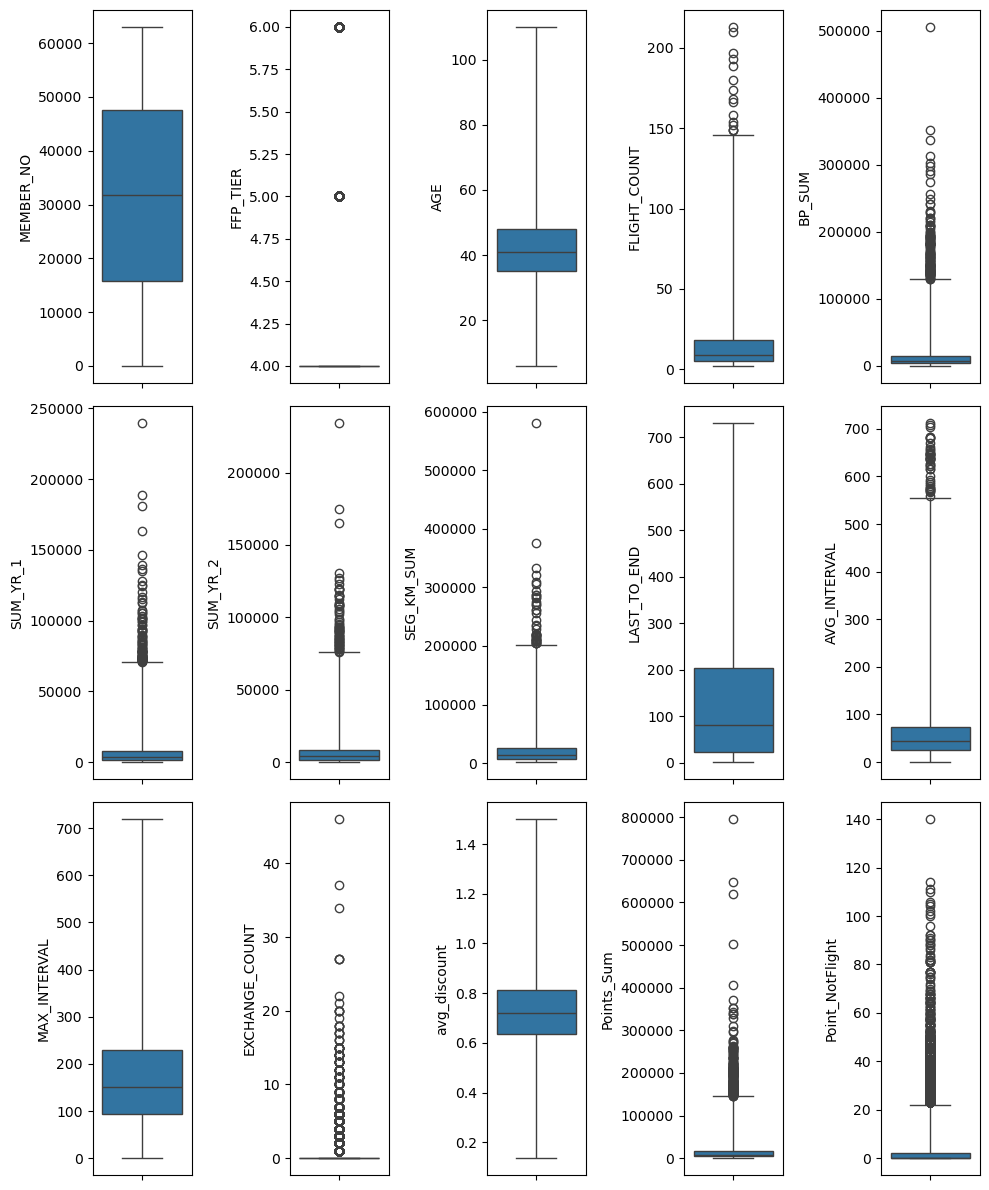

In [19]:
# Plot the distribution using boxplot
# Pick numerical columns
df_num = df_clean.select_dtypes(['int64','float64'])

plt.figure(figsize=(10,12))

for i, col in enumerate(df_num):
    plt.subplot(3,5,i+1)
    sns.boxplot(y=df[col],whis=10.)
    plt.tight_layout()

<Axes: >

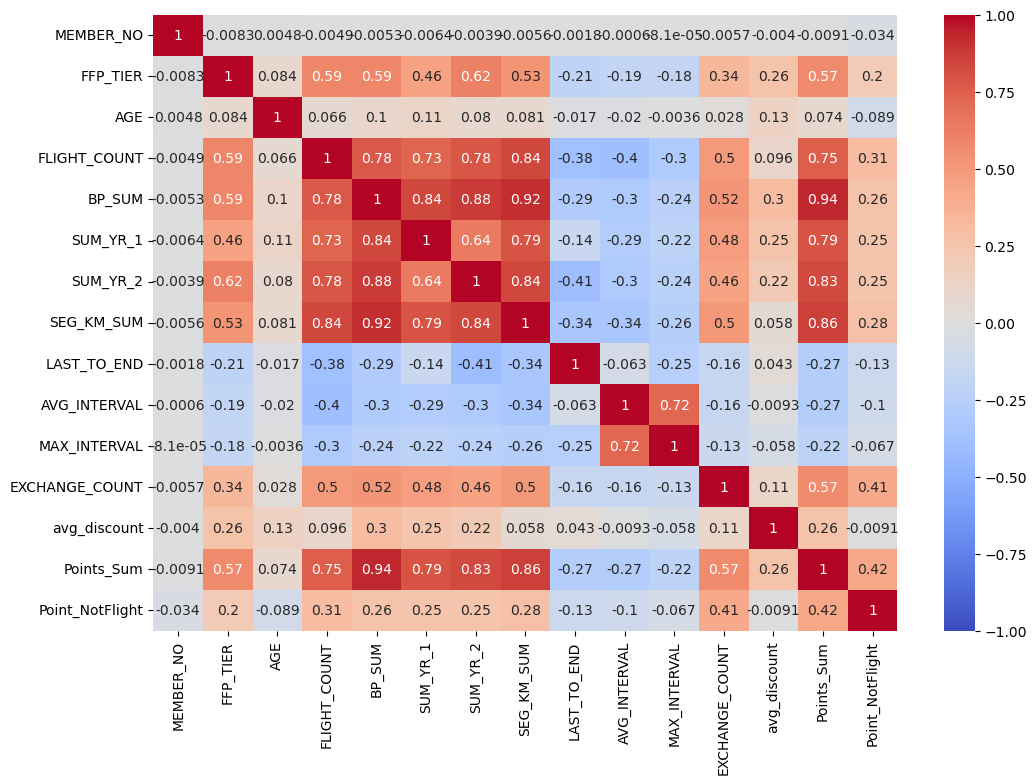

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean[num_cols].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)

In [21]:
# Ignore warnings
pd.options.mode.chained_assignment = None

# Convert date columns to datetime type
df_clean['LOAD_TIME'] = pd.to_datetime(df_clean['LOAD_TIME'])
df_clean['FFP_DATE'] = pd.to_datetime(df_clean['FFP_DATE'])

# Calculate L (difference between LOAD_TIME and FFP_DATE)
df_clean['L'] = (df_clean['LOAD_TIME'] - df_clean['FFP_DATE']).dt.days
# Get R (day since last flight)
df_clean['R'] = df_clean['LAST_TO_END']
# Get F (flight frequency)
df_clean['F'] = df_clean['FLIGHT_COUNT']
# Get M (total mileage)
df_clean['M'] = df_clean['SEG_KM_SUM']
# Get C (average discount)
df_clean['C'] = df_clean['avg_discount']

In [22]:
# Check the distribution
# Make a function to plot boxplot and histogram
def plot_lrfmc(df,feature,axis_label):
    # Plot style
    sns.set(style="ticks")

    # Feature to be plotted
    x = df[feature].values

    # Define figure and axes objects
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)},figsize=(8,6))

    # Plot boxplot and histogram
    sns.boxplot(x=x, ax=ax_box)
    sns.histplot(x=x, ax=ax_hist,kde=True)

    # Delete boxplot ticks
    ax_box.set(yticks=[])
    # Delete some frames of the figure
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    # Label for x axis
    plt.xlabel(axis_label,fontsize=20)
    return

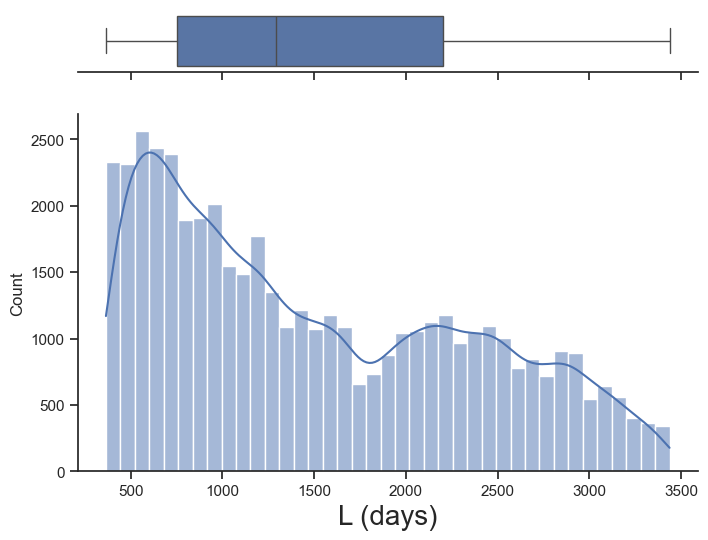

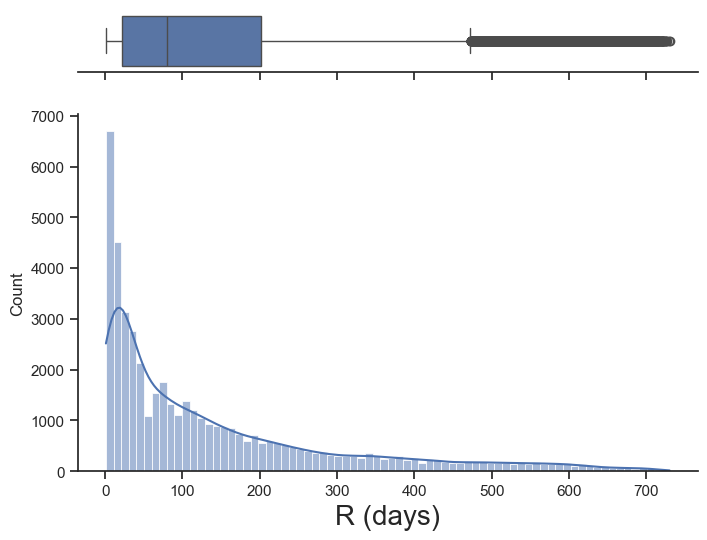

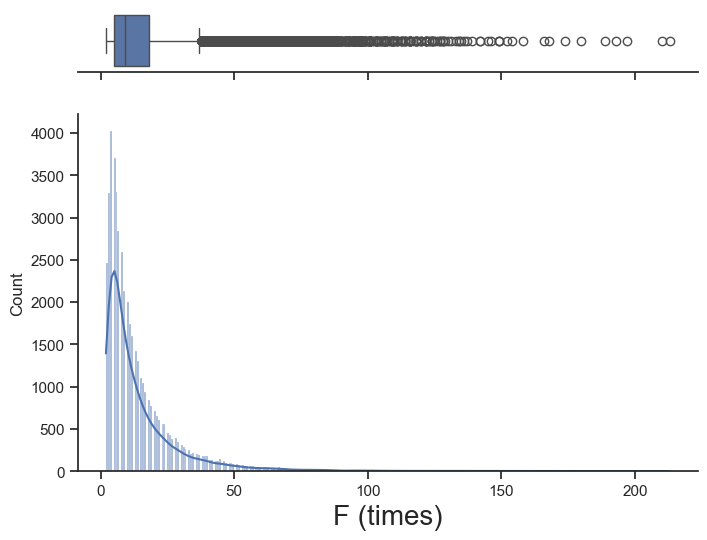

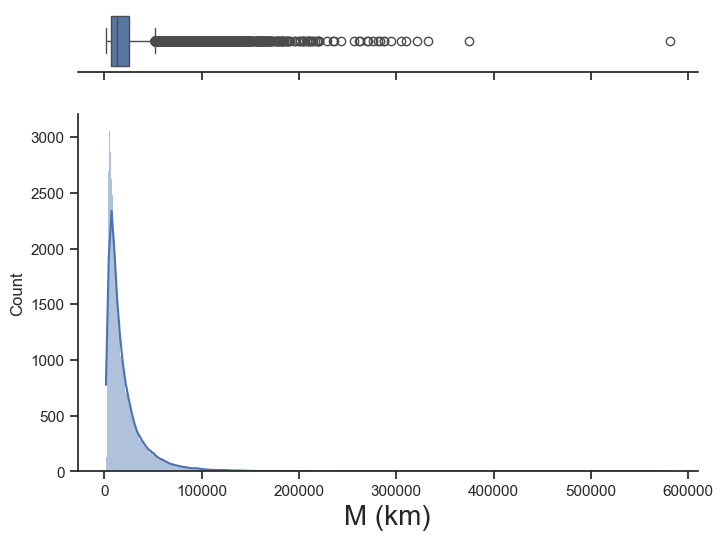

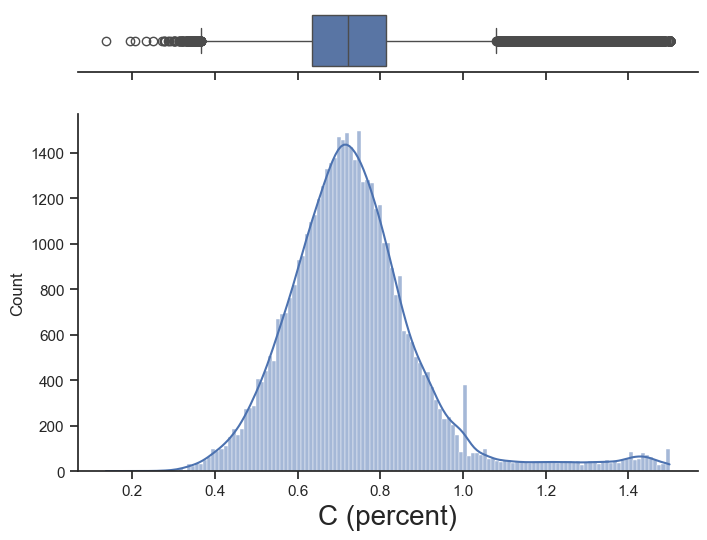

In [23]:
# Distribution of L
plot_lrfmc(df_clean,'L','L (days)')

# Distribution of R
plot_lrfmc(df_clean,'R','R (days)')

# Distribution of F
plot_lrfmc(df_clean,'F','F (times)')

# Distribution of M
plot_lrfmc(df_clean,'M','M (km)')

# Distribution of C
plot_lrfmc(df_clean,'C','C (percent)')

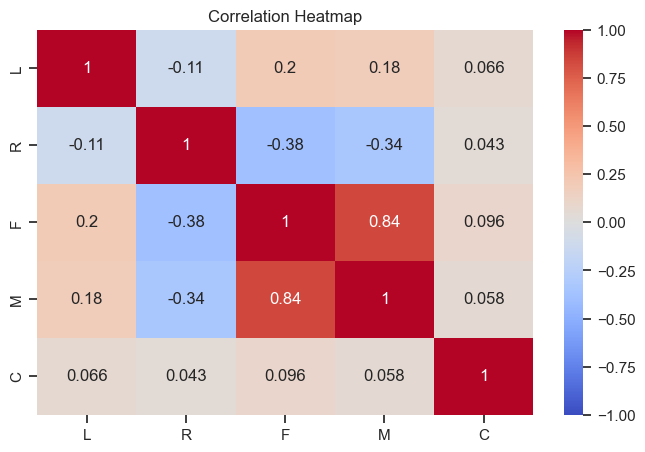

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_clean is the main DataFrame
df_lrfmc = df_clean[['L', 'R', 'F', 'M', 'C']]

# Compute correlation matrix
df_corr = df_lrfmc.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1., vmax=1.)
plt.title("Correlation Heatmap")
plt.show()


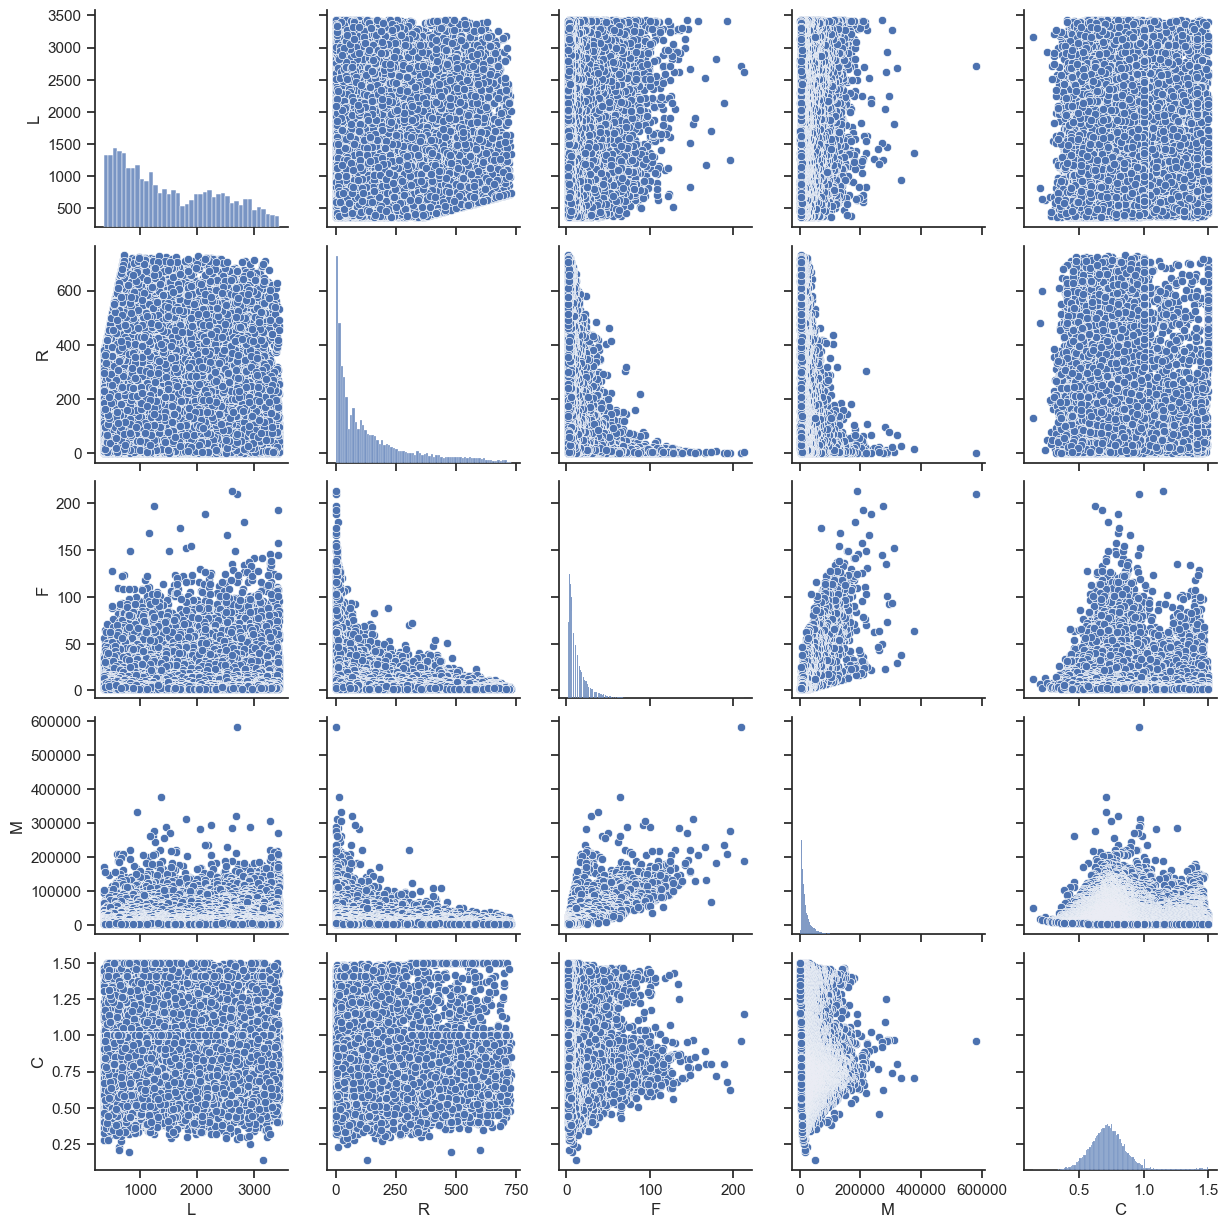

In [25]:
# Create pairplot
sns.pairplot(df_lrfmc)

In [26]:
# Transform to logarithmic units
df_lrfmc['F'] = np.log10(df_lrfmc['F'])
df_lrfmc['M'] = np.log10(df_lrfmc['M'])

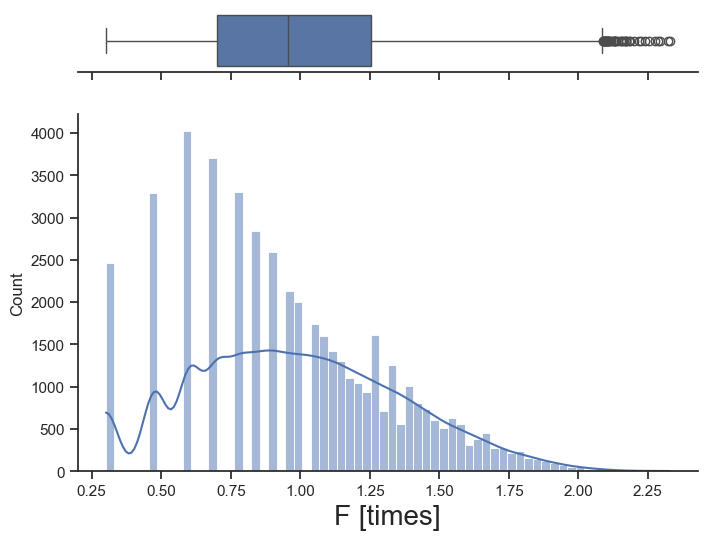

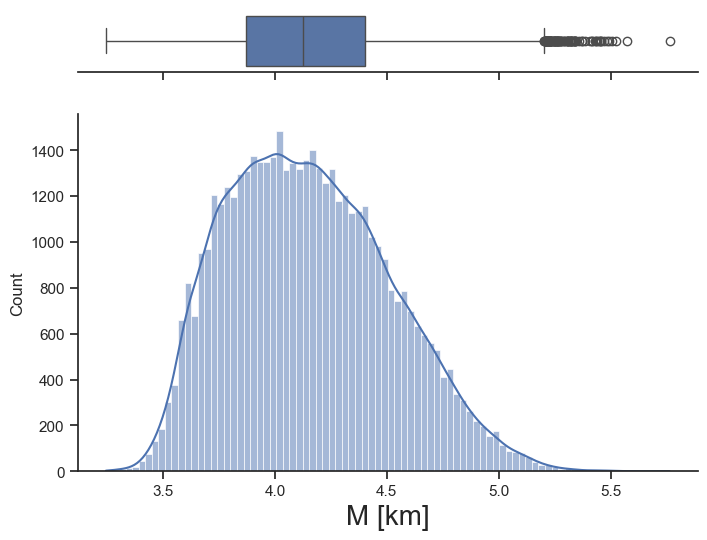

In [27]:
# Check the distribution again
plot_lrfmc(df_lrfmc,'F','F [times]')

plot_lrfmc(df_lrfmc,'M','M [km]')

In [28]:
# Import standardscaler
from sklearn.preprocessing import StandardScaler

# Create an instance for the scaler
scaler = StandardScaler()
# Standardize the LRFMC
scaler.fit(df_lrfmc)
lrfmc_std = scaler.transform(df_lrfmc)

# Check top 5 rows
df_lrfmc_std = pd.DataFrame(data=lrfmc_std,columns=['L','R','F','M','C'])
df_lrfmc_std.head()

,L,R,F,M,C
0,1.420307,-0.882275,3.562166,4.450935,1.270796
1,1.312808,-0.819549,3.051432,3.591286,2.950629
2,0.641824,-0.280110,1.005666,3.581193,2.011610
3,0.368942,-0.857184,3.188534,3.697353,1.322496
4,0.870998,-0.393015,2.608144,3.636420,1.305497


In [29]:
# Import K-means
from sklearn.cluster import KMeans

# Create an empty list for the inertias (WSCC)
inertia = []

# Range of k to be tested
k_values = range(2,11)

# Try different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_lrfmc_std)
    inertia.append(kmeans.inertia_)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

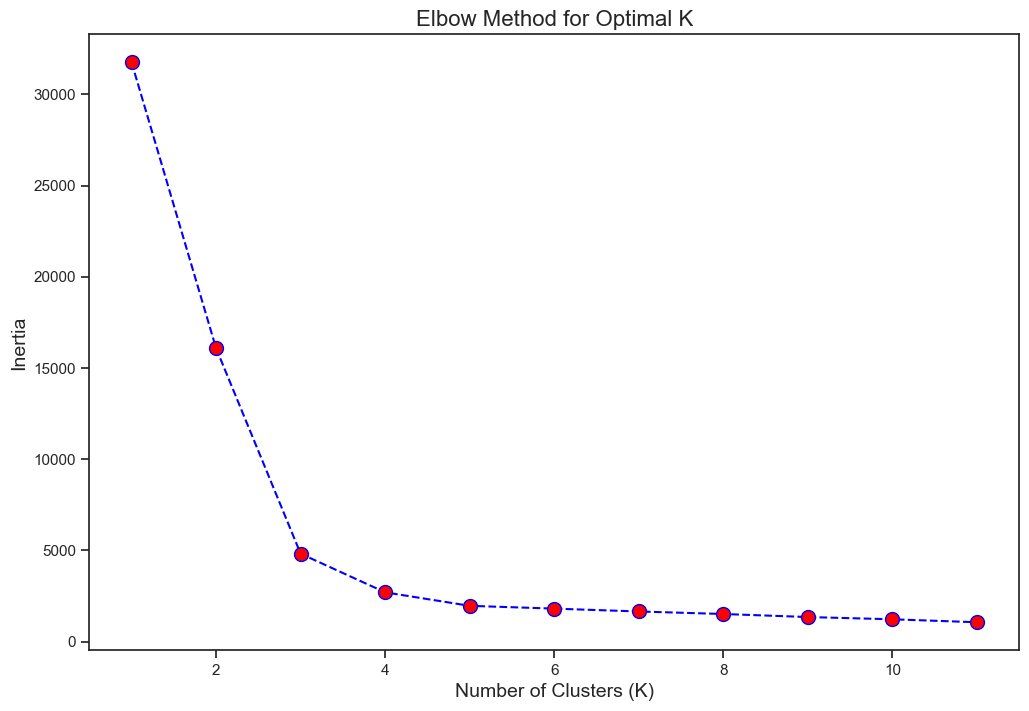

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Example data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.5, random_state=42)

# Calculate inertia for different values of k
k_values = range(1, 12)
inertia = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in k_values]

# Plot the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.show()


In [32]:
!pip install yellowbrick --upgrade

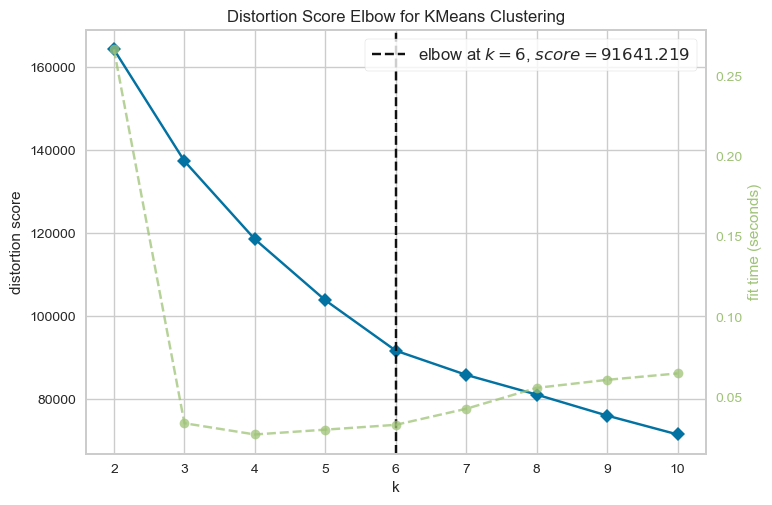

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# We can also use yellowbrick to visualize inertia vs k
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='distortion', timings=True, locate_elbow=True
)

visualizer.fit(df_lrfmc_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

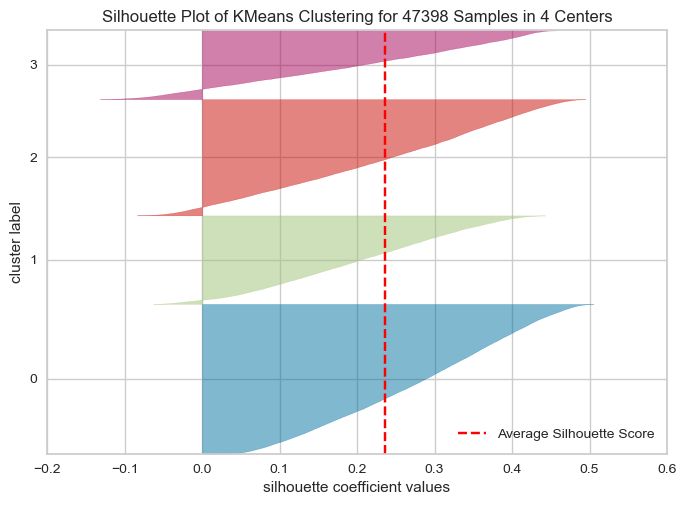

In [ ]:
# Use yellowbrick to create silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
for i in [4,5,6]:
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # Fit the data to the visualizer
    visualizer.fit(df_lrfmc_std)        
    visualizer.show()

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    model, k=(3,8), metric='silhouette', timings=True, locate_elbow=False
)

visualizer.fit(df_lrfmc_std)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure

In [ ]:
from sklearn.decomposition import PCA

# Visualize the segmentation along 2 principal axes (using PCA)
def plot_clusters(df, k_value):
    kmeans = KMeans(n_clusters=k_value,random_state=7)
    kmeans.fit(df)
    
    # Visualization with PCA
    pca = PCA(n_components=2)
    pca.fit(df)
    pcs = pca.transform(df)

    # Store to a new dataframe
    df_lrfmc_pca = pd.DataFrame(data=pcs,columns=['PC1','PC2'])
    df_lrfmc_pca['cluster'] = kmeans.labels_
    
    # Visualization
    plt.figure(figsize=(10,6))

    # Color for each cluster
    color_list = ['red','blue','green','orange','purple','pink']
    color_list = color_list[:k_value]
    
    for i in range(len(df_lrfmc_pca['cluster'].unique())):
        df_dummy = df_lrfmc_pca[df_lrfmc_pca['cluster']==i]
        plt.scatter(df_dummy['PC1'],df_dummy['PC2'],c=color_list[i],s=5,label=f'Cluster {i}')
        # Centroid positions
        plt.scatter(df_dummy['PC1'].mean(),df_dummy['PC2'].mean(),c=color_list[i],marker='X',edgecolor='k',s=250,zorder=10)

    plt.legend()
    plt.title(f'Segmentation for {k_value} clusters')
    plt.xlabel('PC1',fontsize=14)
    plt.ylabel('PC2',fontsize=14)

    return

In [ ]:
# Visualization for 5 clusters
plot_clusters(df_lrfmc_std,6)

In [ ]:
# Using k=6 and save the labels
kmeans = KMeans(n_clusters=6,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

In [ ]:
# Create a function to plot median LRFMC
def snake_plot(df_lrfmc_std, n_clusters):
    
    # Create segmentation
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(df_lrfmc_std)
    df_labels = pd.DataFrame(kmeans.labels_,columns=['cluster'])
    df_clusters = df_lrfmc_std.join(df_labels)
    
    # Create summary dataframe
    lrfmc_summary = df_clusters.groupby(['cluster']).agg(num_members=('cluster','size'),
                                                  median_L=('L','median'),
                                                  median_R=('R','median'),
                                                  median_F=('F','median'),
                                                  median_M=('M','median'),
                                                  median_C=('C','median')).reset_index()
    
    # Melt dataframe into long format
    df_melt = pd.melt(lrfmc_summary.reset_index(), 
                            id_vars=['cluster'],
                            value_vars=['median_L', 'median_R', 'median_F','median_M','median_C'], 
                            var_name='Metric', 
                            value_name='Value')

    plt.figure()
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster')
    
    return

In [ ]:
# For k=6
snake_plot(df_lrfmc_std,6)

In [ ]:
##### Check cluster composition
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

In [ ]:
# Radar chart using plotly
import plotly.graph_objects as go

# List of feature name
categories = ['L','R','F','M','C']

fig = go.Figure()

# Create summary statistics using the standardized LRFMC
# Since plotly still has not supported varying radial scales
lrfmc_summary = df_clusters.groupby(['cluster']).agg(mean_L=('L','median'),
                                  mean_R=('R','median'),
                                  mean_F=('F','median'),
                                  mean_M=('M','median'),
                                  mean_C=('C','median'))

# Make radar chart for every cluster
for i in range(len(lrfmc_summary)):
    fig.add_trace(go.Scatterpolar(
          r=lrfmc_summary.loc[i].values,
          theta=categories,
          fill='toself',
          name=f'Cluster {i}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

fig.show()

In [ ]:
# For k = 5
snake_plot(df_lrfmc_std,5)

# Using k=5 and save the labels
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

##### Check cluster composition
plt.figure()
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})

In [ ]:
# For k = 7
snake_plot(df_lrfmc_std,7)

# Using k=7 and save the labels
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(df_lrfmc_std)
# create a copy of the dataframe
df_clusters = df_lrfmc_std.copy()
df_clusters['cluster'] = kmeans.labels_

##### Check cluster composition
plt.figure()
sns.countplot(x='cluster',data=df_clusters)

# Dataframe to show cluster member
pd.DataFrame(df_clusters['cluster'].value_counts()).reset_index().rename(columns={'cluster':'member','index':'cluster'})